In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
df=pd.read_csv('spam.csv')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1590,ham,Somewhr someone is surely made 4 u. And God ha...,NaN,NaN,NaN
5304,ham,Pls ask macho how much is budget for bb bold 2...,NaN,NaN,NaN
2011,ham,Do whatever you want. You know what the rules ...,NaN,NaN,NaN
4869,ham,Dip's cell dead. So i m coming with him. U bet...,NaN,NaN,NaN
1076,ham,Where can download clear movies. Dvd copies.,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#1.Data Cleaning
#2. EDA
#3.Text preprocessing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

In [ ]:
##1. Data Cleaning

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2381,ham,Best line said in Love: . \I will wait till th...
4308,ham,He dint tell anything. He is angry on me that ...
3837,ham,Went to pay rent. So i had to go to the bank t...
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...
5358,ham,Hmm. Shall i bring a bottle of wine to keep us...


In [ ]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder #for converting ham and spam to 0 and 1
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
##EDA #exploratory data analysis

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


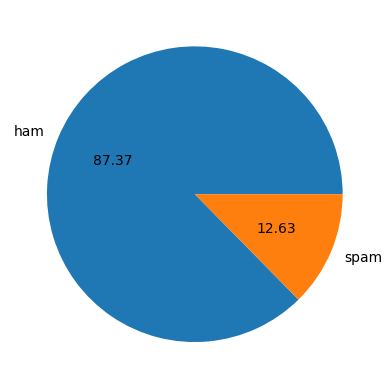

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
#Data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for ham messages only
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam messages only"
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

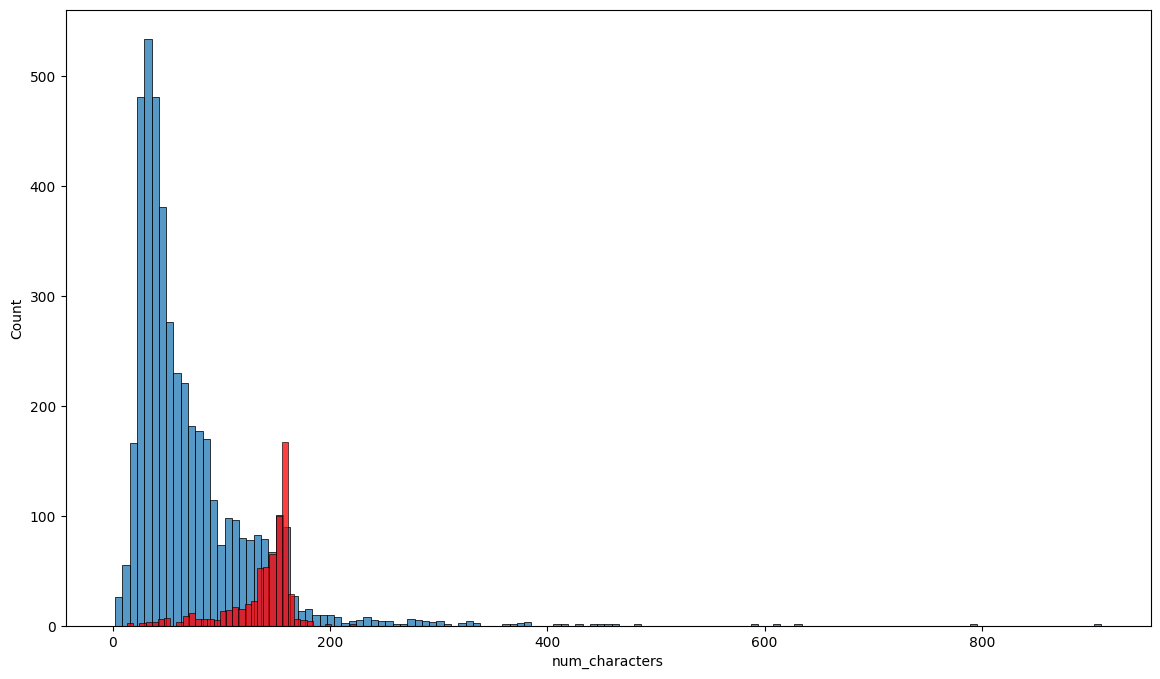

In [ ]:
plt.figure(figsize=(14,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

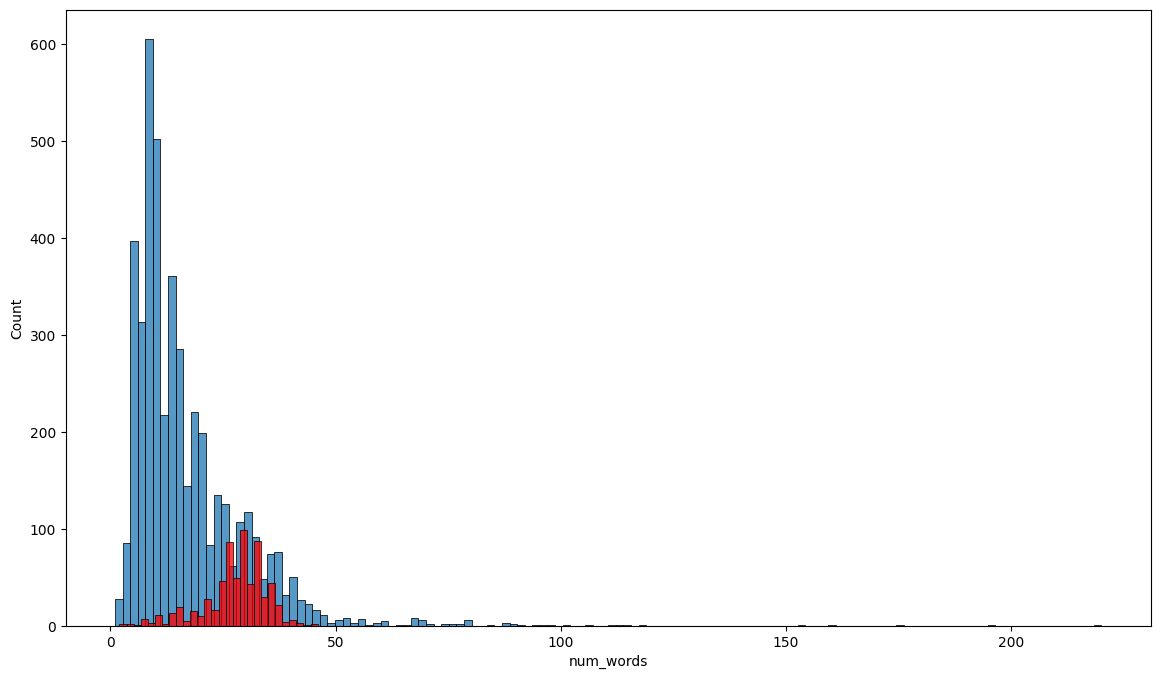

In [ ]:
plt.figure(figsize=(14,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

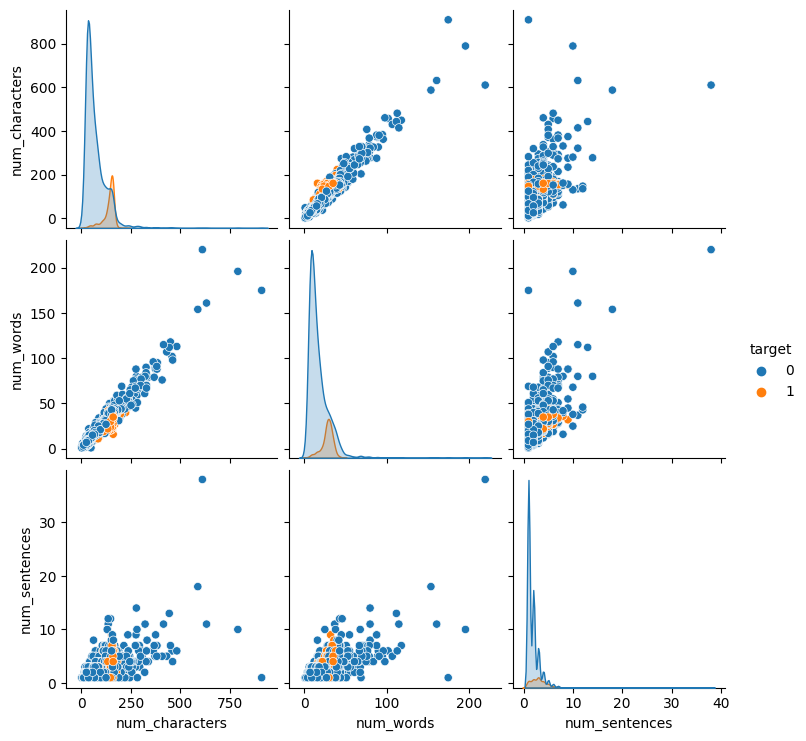

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

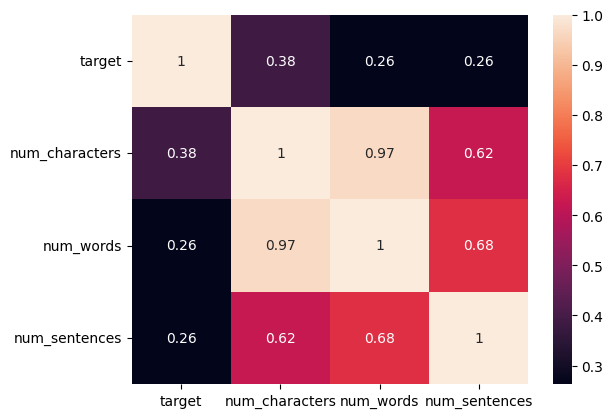

In [ ]:
sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
*lower case

*Tokenization

*Removing special characters

*Removing stop words and punctuations

*Stemming



In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#for removing stop words and punctuations
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#stamming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving') 

'love'

In [ ]:
#@title Default title text
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

    #removing stopwords and punctuations form the data
    text=y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in  string.punctuation:
        y.append(i)

      test=y[:]
      y.clear()
      for i in text:
        y.append(ps.stem(i))


  return " ".join(y) 

In [ ]:
transform_text('Hi how Are %% you? my waving for loving name is AKshay')

'hi how are you my wave for love name is akshay'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

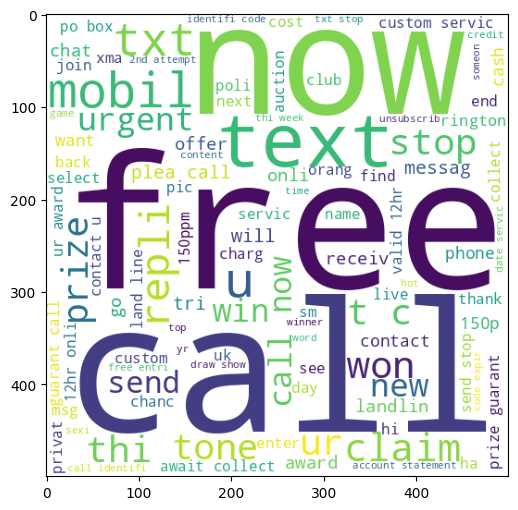

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

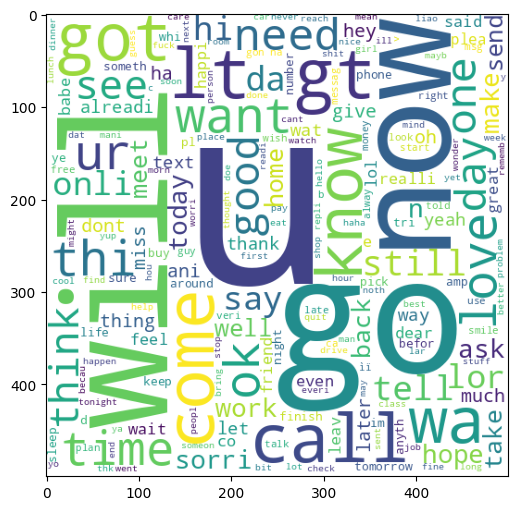

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

Top 50 words in spam and ham

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

14475

In [ ]:
# from collections import Counter
# sns.barplot(a=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],b=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(ham_corpus)

0

In [ ]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

Model Building

In [ ]:
# Vectorising data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[795 101]
 [ 27 111]]
0.5235849056603774


In [ ]:
mnb.fit(X_train,y_train) # precision increased so much that their is no false negative
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[893   3]
 [ 15 123]]
0.9761904761904762


In [ ]:
# we choose tfidf with mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {'SVC': svc, 'KN': knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc, 'GBDT': gbdt, 'xgb': xgb}


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9796905222437138, 0.975609756097561)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.923728813559322
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  GBDT
Accuracy -  0.960348162475822
Precision -  0.9532710280373832
For  xgb
Accuracy -  0.9864603481624759
Precision -  0.9920634920634921


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.968085,1.000000
5,RF,0.971954,1.000000
10,xgb,0.986460,0.992063
8,ETC,0.976789,0.983051
0,SVC,0.979691,0.975610
9,GBDT,0.960348,0.953271
4,LR,0.963250,0.946429
7,BgC,0.967118,0.926230
6,AdaBoost,0.963250,0.923729


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

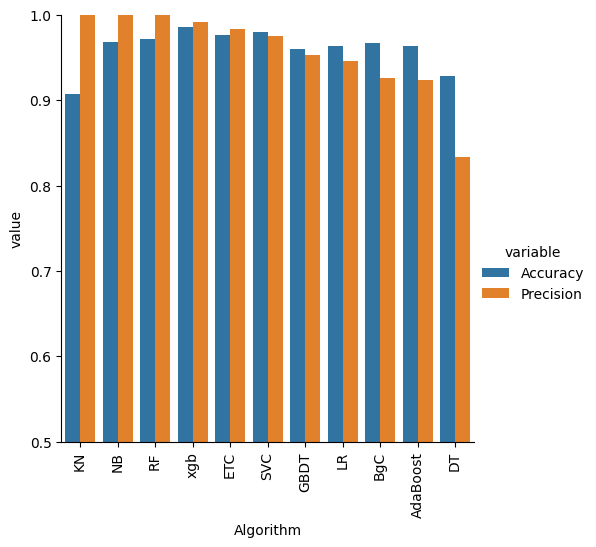

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,xgb,0.986460,0.992063,0.986460,0.992063,0.986460,0.992063,0.986460,0.992063
4,ETC,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
5,SVC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
6,GBDT,0.960348,0.953271,0.960348,0.953271,0.960348,0.953271,0.960348,0.953271
7,LR,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
8,BgC,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
9,AdaBoost,0.963250,0.923729,0.963250,0.923729,0.963250,0.923729,0.963250,0.923729


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9916666666666667


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))